In [2]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
RESULTS = '../results/wildfish'

In [20]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_60_500_rebalanced_llava.jsonl'), "r")]

In [21]:
vila = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_60_500_rebalanced_vila.jsonl'), "r")]

In [4]:
gpt = json.load(open(f'{RESULTS}/0_60_500sample_rebalanced_gpt.json'))
gemini = json.load(open(f'{RESULTS}/0_60_500sample_rebalanced_gemini.json'))

# GPT

In [5]:
refine = []
rerun = []
error = []
for pair in gpt:
    new = deepcopy(pair)
    if pair['gpt_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_answer']:
        new['gpt_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['gpt_answer']:
        new['gpt_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'wildfish/diff_images/val/Coradion_chrysozonus-Coradion_altivelis/Coradion_chrysozonus/Coradion_chrysozonus_0022.jpg', 'image_2': 'wildfish/diff_images/val/Coradion_chrysozonus-Coradion_altivelis/Coradion_altivelis/Coradion_altivelis_0043.jpg', 'answer': 'Right', 'question': 'Which fish has less eyespots?', 'gpt_answer': 'GPT error'}
{'image_1': 'wildfish/diff_images/val/Naso_elegans-Naso_lituratus/Naso_elegans/Naso_elegans_0025.jpg', 'image_2': 'wildfish/diff_images/val/Naso_elegans-Naso_lituratus/Naso_lituratus/Naso_lituratus_0059.jpg', 'answer': 'Left', 'question': 'Which fish has a more yellow dorsal fin?', 'gpt_answer': 'GPT error'}
{'image_1': 'wildfish/diff_images/val/Chaetodon_vagabundus-Chaetodon_decussatus/Chaetodon_vagabundus/Chaetodon_vagabundus_0039.jpg', 'image_2': 'wildfish/diff_images/val/Chaetodon_vagabundus-Chaetodon_decussatus/Chaetodon_decussatus/Chaetodon_decussatus_0027.jpg', 'answer': 'Left', 'question': 'Which fish has a more solid yellow backside wi

In [6]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_answer'])
    elif pair['answer'] != pair['gpt_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

In [7]:
len(correct) / (len(correct) + len(wrong))

0.7220447284345048

In [10]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 467, 'Left': 400})

In [8]:
len(gpt)

946

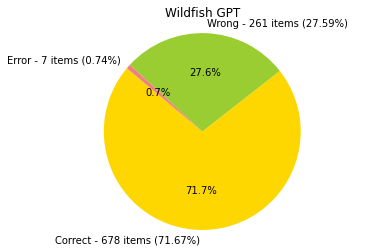

In [10]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Wildfish GPT')
plt.show()

# Geimini

In [12]:
error = []
refine = []
for pair in gemini:
    new = deepcopy(pair)
    if 'Left' in pair['gemini_answer']:
        new['gemini_answer'] = 'Left'
        refine.append(new)
    elif 'Right' in pair['gemini_answer']:
        new['gemini_answer'] = 'Right'
        refine.append(new)
    else:
        
        #refine.append(pair)
        error.append(pair)
        print(pair)
        

{'image_1': 'wildfish/diff_images/val/Heniochus_diphreutes-Heniochus_acuminatus/Heniochus_diphreutes/Heniochus_diphreutes_0000.jpg', 'image_2': 'wildfish/diff_images/val/Heniochus_diphreutes-Heniochus_acuminatus/Heniochus_acuminatus/Heniochus_acuminatus_0068.jpg', 'answer': 'Left', 'question': 'Which fish has a more right-angled tip of the anal fin?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'wildfish/diff_images/val/Heniochus_diphreutes-Heniochus_acuminatus/Heniochus_diphreutes/Heniochus_diphreutes_0009.jpg', 'image_2': 'wildfish/diff_images/val/Heniochus_diphreutes-Heniochus_acuminatus/Heniochus_acuminatus/Heniochus_acuminatus_0088.jpg', 'answer': 'Right', 'question': 'Which fish has a more right-angled tip of the anal fin?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'wildfish/diff_images/val/Amphiprion_rubrocinctus-Amphiprion_melanopus/Amphiprion_rubrocinctus/Amphiprion_rubrocinctus_0016.jpg', 'image_2': 'wildfish/diff_images/val/Amphiprion_rubrocinctus-Amphiprion_melanopus/A

In [13]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gemini_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gemini_answer']:
            correct.append(pair)
            correct_pred.append(pair['gemini_answer'])
    elif pair['answer'] != pair['gemini_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gemini_answer'])
    else:
        print('fuck')

In [15]:
Counter(correct_pred+wrong_pred)

Counter({'Left': 571, 'Right': 299})

In [16]:
len(correct) / (len(correct) + len(wrong))

0.593103448275862

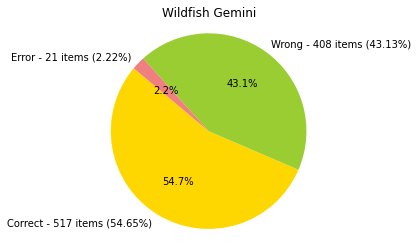

In [15]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Wildfish Gemini')
plt.show()

# LLaVA-1.6

In [22]:
error = []
refine = []
rerun = []
for pair in llava:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [23]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [24]:
len(correct) / (len(correct) + len(wrong))

0.6839323467230444

In [25]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 638, 'Left': 308})

In [26]:
len(llava)

946

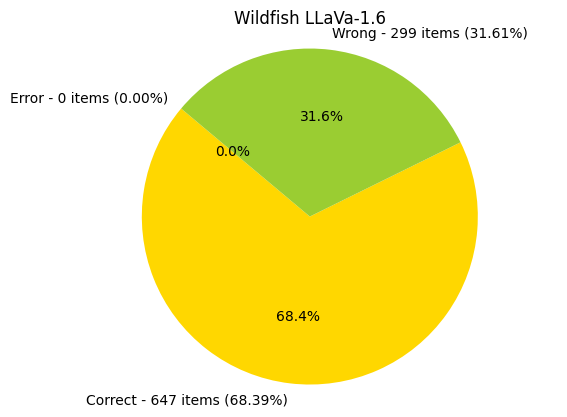

In [27]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Wildfish LLaVa-1.6')
plt.show()

# Vila1.5

In [28]:
error = []
refine = []
rerun = []
for pair in vila:
    new = deepcopy(pair)
    if pair['vila_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['vila_answer']:
        new['vila_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['vila_answer']:
        new['vila_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

In [29]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['vila_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['vila_answer']:
            correct.append(pair)
            correct_pred.append(pair['vila_answer'])
    elif pair['answer'] != pair['vila_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['vila_answer'])
    else:
        print('fuck')

In [30]:
len(correct) / (len(correct) + len(wrong))

0.5274841437632135

In [31]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 920, 'Right': 26})

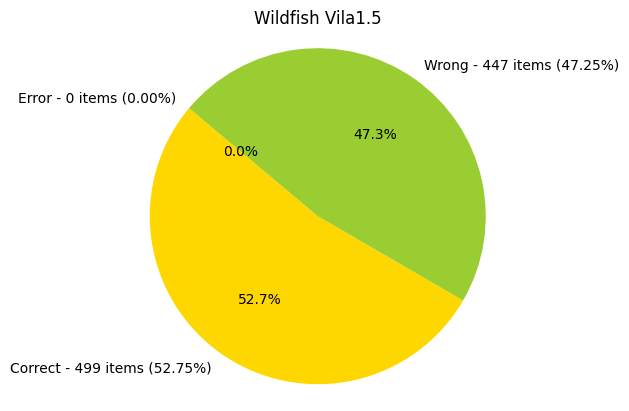

In [32]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Wildfish Vila1.5')
plt.show()